In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum().any()

False

## Data Exploration

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

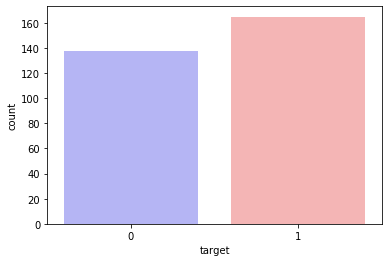

In [9]:
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [10]:
countNoDisease = len(df[df['target'] == 0])
countDisease = len(df[df['target'] == 1])
print('Percentage of people having heart disease:', "{:.2f}%".format((countDisease / len(df)) * 100))
print('Percentage of people not having heart disease:', "{:.2f}%".format((countNoDisease / len(df)) * 100))

Percentage of people having heart disease: 54.46%
Percentage of people not having heart disease: 45.54%


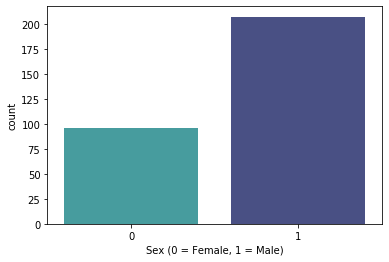

In [11]:
sns.countplot(x='sex', data=df, palette='mako_r')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.show()

In [12]:
countFemale = len(df[df['sex'] == 0])
countMale = len(df[df['sex'] == 1])
print('Percentage of Female Patients:', "{:.2f}%".format((countFemale / len(df)) * 100))
print('Percentage of Male Patients:', "{:.2f}%".format((countMale / len(df)) * 100))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [13]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


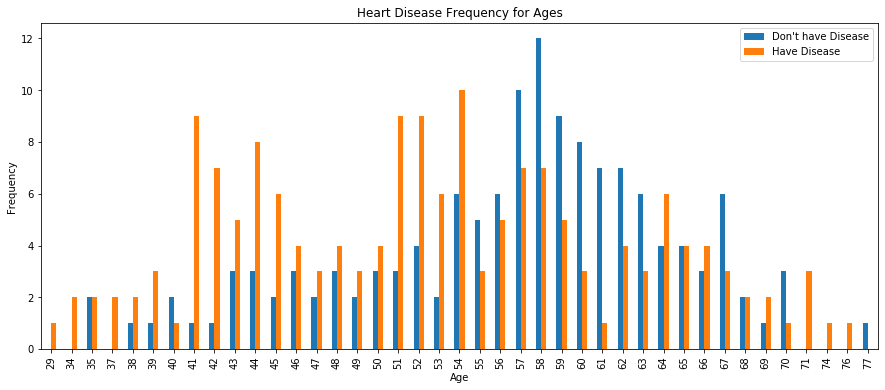

In [14]:
pd.crosstab(df['age'], df['target']).plot(kind='bar', figsize=(15,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
# L = plt.legend()
# L.get_texts()[0].set_text("Don't have Disease")
# L.get_texts()[1].set_text('Have Disease')
labels = ["Don't have Disease", 'Have Disease']
plt.legend(labels)
plt.show()

The above graph can also be made by:   
plt.figure(figsize=(20,6))   
sns.countplot(x='age',data = df, hue = 'target')   
plt.show()   

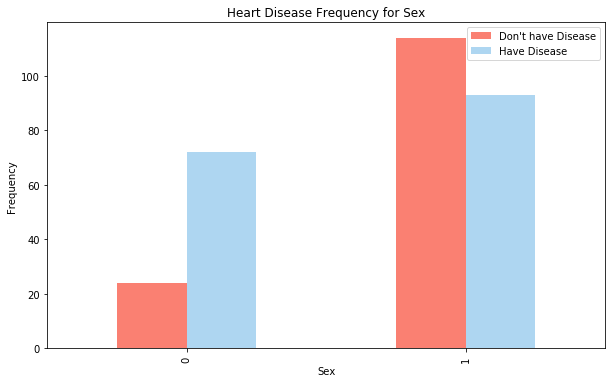

In [15]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar', figsize=(10,6), color=['#FA8072','#AED6F1'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
L = plt.legend()
L.get_texts()[0].set_text("Don't have Disease")
L.get_texts()[1].set_text('Have Disease')
# labels = ["Don't have Disease", 'Have Disease']
# plt.legend(labels)
plt.show()

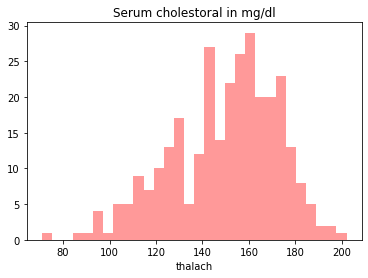

In [16]:
sns.distplot(df['thalach'],kde=False,bins=30,color='red')
plt.title('Serum cholestoral in mg/dl')
plt.show()

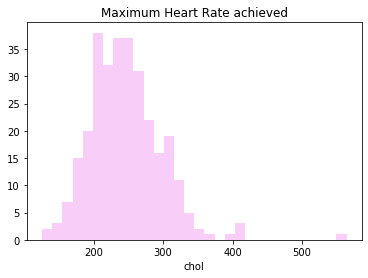

In [17]:
sns.distplot(df['chol'],kde=False,bins=30,color='violet')
plt.title('Maximum Heart Rate achieved')
plt.show()

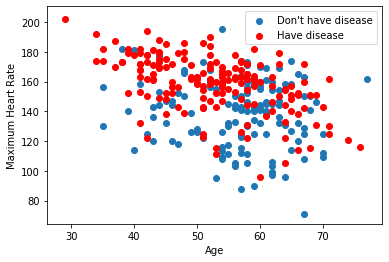

In [18]:
plt.scatter(x = df['age'][df['target']==0], y = df['thalach'][df['target']==0])
plt.scatter(x = df['age'][df['target']==1], y = df['thalach'][df['target']==1], c='red')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(["Don't have disease", 'Have disease'])
plt.show()

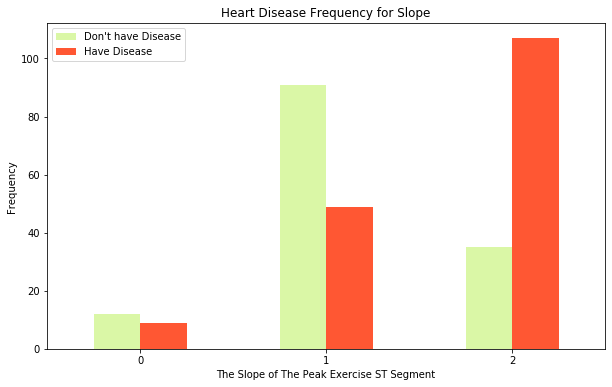

In [19]:
pd.crosstab(df['slope'], df['target']).plot(kind='bar', figsize=(10,6), color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", 'Have Disease'])
plt.show()

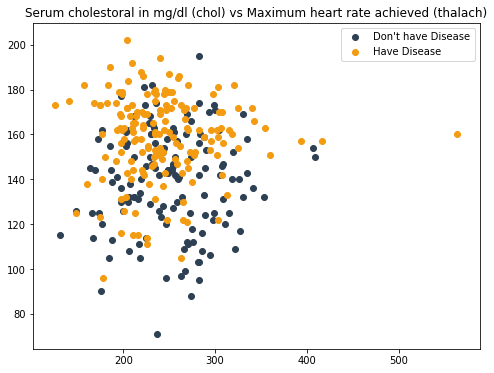

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x = df['chol'][df['target']==0], y = df['thalach'][df['target']==0], c='#2E4053')
plt.scatter(x = df['chol'][df['target']==1], y = df['thalach'][df['target']==1], c='#F39C12')
plt.title('Serum cholestoral in mg/dl (chol) vs Maximum heart rate achieved (thalach)')
plt.legend(["Don't have Disease", 'Have Disease'])
# L = plt.legend()
# L.get_texts()[0].set_text("Don't have Disease")
# L.get_texts()[1].set_text('Have Disease')
plt.show()

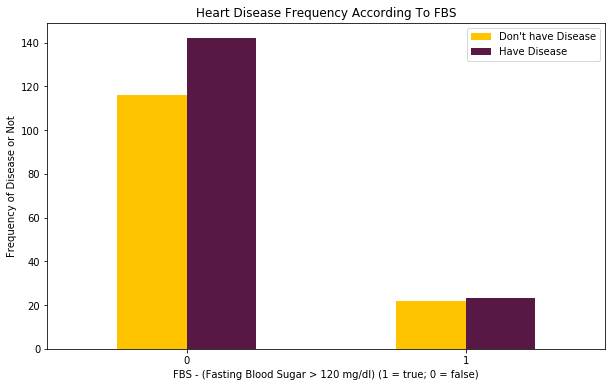

In [21]:
pd.crosstab(df['fbs'], df['target']).plot(kind='bar', figsize=(10,6), color=['#FFC300','#581845'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Don't have Disease", 'Have Disease'])
plt.ylabel('Frequency of Disease or Not')
plt.show()

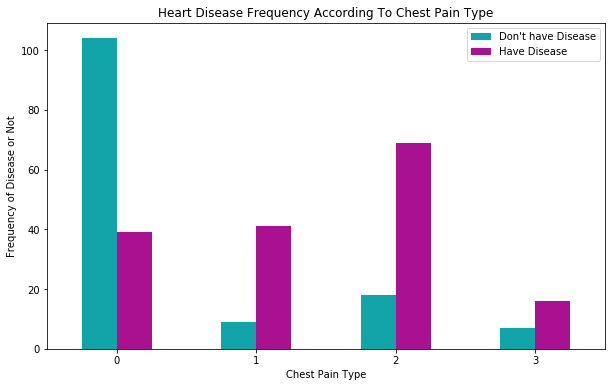

In [22]:
pd.crosstab(df['cp'],df['target']).plot(kind='bar', figsize=(10,6), color=['#11A5AA','#AA1190'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.legend(["Don't have Disease", 'Have Disease'])
plt.show()

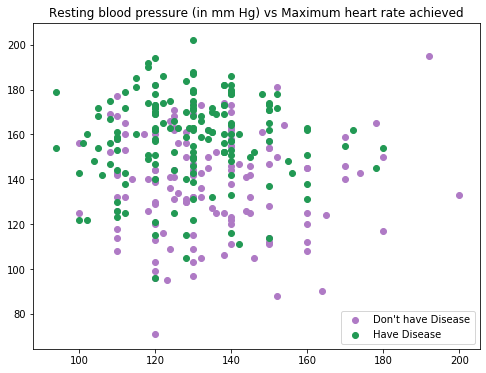

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(x = df['trestbps'][df['target']==0], y = df['thalach'][df['target']==0], c='#AF7AC5')
plt.scatter(x = df['trestbps'][df['target']==1], y = df['thalach'][df['target']==1], c='#229954')
plt.title('Resting blood pressure (in mm Hg) vs Maximum heart rate achieved')
plt.legend(["Don't have Disease", 'Have Disease'])
plt.show()

In [24]:
df.corr().target.sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

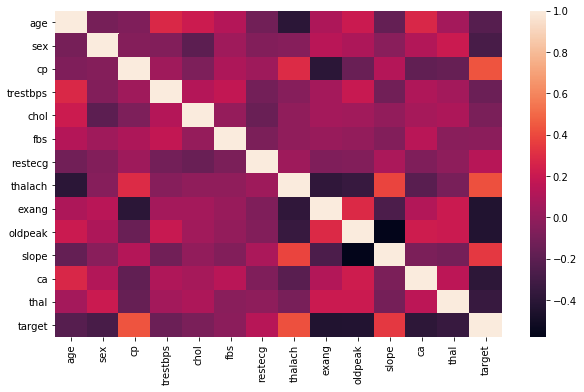

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())
plt.show()

## Creating Dummy Variables

In [26]:
a = pd.get_dummies(df['cp'], prefix='cp')
b = pd.get_dummies(df['thal'], prefix='thal')
c = pd.get_dummies(df['slope'], prefix='slope')

In [27]:
frames = [df, a, b, c]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [28]:
df.drop(columns = ['cp', 'thal', 'slope'], axis=1, inplace=True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## Machine Learning

In [29]:
df_trn = df.drop(['target'], axis=1)
y_trn = df['target']

In [30]:
y_trn

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Normalize and split the data

In [31]:
df_trn = (df_trn - np.min(df_trn)) / (np.max(df_trn) - np.min(df_trn))

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(df_trn, y_trn, test_size = 0.2, random_state=0)

### Defining the Evaluation Metric

In [33]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

#### Output format of print_score():
#### [RMSE of Training Data, RMSE of Validation Data, Accuracy on Training Data, Accuracy on Validation Data]

### Random Forest

In [34]:
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)
print_score(rf1)

[0.0, 0.3841106397986879, 1.0, 0.8524590163934426]


In [35]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# param_distribs = {
#         'n_estimators': randint(low=1, high=400),
#         'max_features': randint(low=0.4, high=8),
#     }

# forest_cla = RandomForestClassifier(random_state=42, n_jobs=-1)
# rnd_search = RandomizedSearchCV(forest_cla, param_distributions=param_distribs,
#                                 n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
# rnd_search.fit(X_train, y_train)

In [36]:
# cvres = rnd_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [37]:
rf = RandomForestClassifier(max_features=1, n_estimators=600, n_jobs=-1)
rf.fit(X_train, y_train)
print_score(rf)

acc_rf = rf.score(X_valid, y_valid) * 100

[0.0, 0.31362502409359, 1.0, 0.9016393442622951]


### Feature Importance of Random Forest Classifier

In [38]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [39]:
fi = rf_feat_importance(rf, df_trn); fi[:20]

,cols,imp
6,thalach,0.102486
8,oldpeak,0.091819
9,ca,0.091537
0,age,0.089511
3,chol,0.084097
2,trestbps,0.082063
16,thal_2,0.071488
10,cp_0,0.060457
17,thal_3,0.052316
7,exang,0.050049


In [40]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

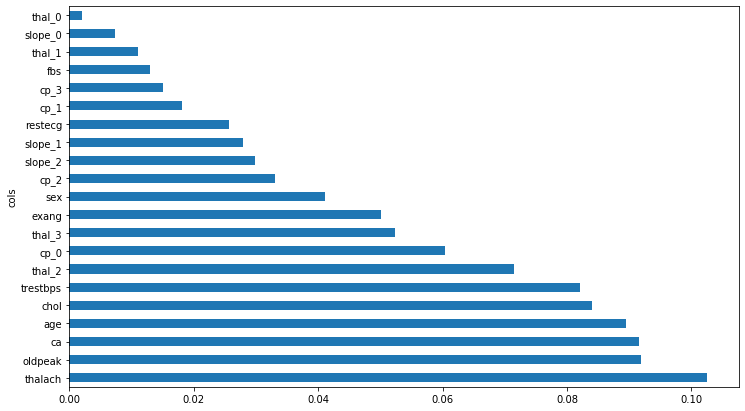

In [41]:
plot_fi(fi[:30])

### Logistic Regression

In [42]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print_score(lr)

acc_lr = lr.score(X_valid, y_valid) * 100

[0.37482778414706003, 0.3621429841700741, 0.859504132231405, 0.8688524590163934]


### K-Nearest Neighbors (KNN)

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print_score(knn)

acc_knn = knn.score(X_valid, y_valid) * 100

[0.35790944881871867, 0.3387537429470791, 0.871900826446281, 0.8852459016393442]


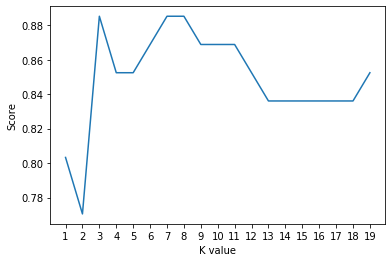

Maximum KNN Score is 88.52%


In [44]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_valid, y_valid))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

### Support Vector Machine (SVM)

In [45]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
print_score(svm)

acc_svm = svm.score(X_valid, y_valid) * 100

[0.3692744729379982, 0.3387537429470791, 0.8636363636363636, 0.8852459016393442]


### Naive Bayes

In [46]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print_score(nb)

acc_nb = nb.score(X_valid, y_valid) * 100

[0.39101478486557395, 0.3621429841700741, 0.8471074380165289, 0.8688524590163934]


### Decision Tree

In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print_score(dtc)

acc_dtc = dtc.score(X_valid, y_valid) * 100

[0.0, 0.47907013758040845, 1.0, 0.7704918032786885]


### XGB 

In [48]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print_score(xgb)

acc_xgb = xgb.score(X_valid, y_valid) * 100

[0.0, 0.3841106397986879, 1.0, 0.8524590163934426]


## Comparing Models

In [49]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 'SVM', 
              'Decision Tree', 'Random Forest', 'XGB'],
    'Score': [
        acc_knn, 
        acc_lr,      
        acc_nb,  
        acc_svm, 
        acc_dtc,
        acc_rf,
        acc_xgb
    ]})
cv_models.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Random Forest,90.163934
1,KNN,88.524590
2,SVM,88.524590
3,Logistic Regression,86.885246
4,Naive Bayes,86.885246
5,XGB,85.245902
6,Decision Tree,77.049180


## Confusion Matrices

In [50]:
y_head_lr = lr.predict(X_valid)
y_head_knn = knn.predict(X_valid)
y_head_svm = svm.predict(X_valid)
y_head_nb = nb.predict(X_valid)
y_head_dtc = dtc.predict(X_valid)
y_head_rf = rf.predict(X_valid)
y_head_xgb = xgb.predict(X_valid)

In [51]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_valid, y_head_lr)
cm_knn = confusion_matrix(y_valid, y_head_knn)
cm_svm = confusion_matrix(y_valid, y_head_svm)
cm_nb = confusion_matrix(y_valid, y_head_nb)
cm_dtc = confusion_matrix(y_valid, y_head_dtc)
cm_rf = confusion_matrix(y_valid, y_head_rf)
cm_xgb = confusion_matrix(y_valid, y_head_xgb)

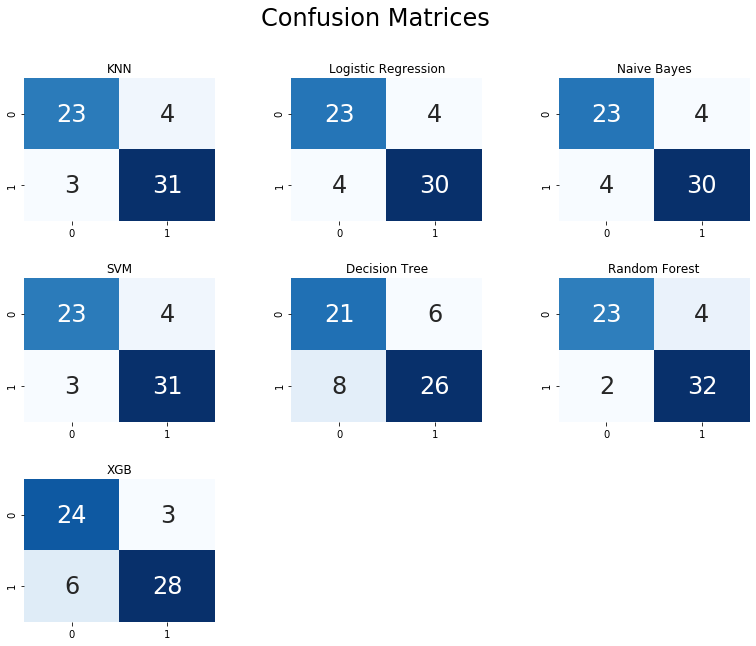

In [52]:
plt.figure(figsize=(13, 10))
plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

titles = ['KNN', 'Logistic Regression', 'Naive Bayes', 'SVM', 
              'Decision Tree', 'Random Forest', 'XGB']
l = [cm_knn, cm_lr, cm_nb, cm_svm, cm_dtc, cm_rf, cm_xgb]

for i in range(7):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    sns.heatmap(l[i],annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()